In [ ]:
import pandas as pd 
import matplotlib.pyplot as plt
import numpy as np
df = pd.read_csv('https://raw.githubusercontent.com/italia/covid19-opendata-vaccini/master/dati/punti-somministrazione-latest.csv')
df

,area,provincia,comune,presidio_ospedaliero,codice_NUTS1,codice_NUTS2,codice_regione_ISTAT,nome_area
0,ABR,CHIETI,CHIETI,PRESIDIO OSPEDALIERO SS ANNUNZIATA,ITF,ITF1,13,Abruzzo
1,ABR,CHIETI,LANCIANO,PRESIDIO OSPEDALIERO RENZETTI,ITF,ITF1,13,Abruzzo
2,ABR,CHIETI,VASTO,PRESIDIO OSPEDALIERO SAN PIO,ITF,ITF1,13,Abruzzo
3,ABR,L'AQUILA,AVEZZANO,P.O. SS. FILIPPO E NICOLA,ITF,ITF1,13,Abruzzo
4,ABR,L'AQUILA,L'AQUILA,PRESIDIO OSPEDALIERO SAN SALVATORE,ITF,ITF1,13,Abruzzo
...,...,...,...,...,...,...,...,...
288,VEN,ROVIGO,ROVIGO,"OSPEDALE ""SANTA MARIA DELLA MISERICORDIA""",ITH,ITH3,5,Veneto
289,VEN,TREVISO,VITTORIO VENETO,OSPEDALE DI VITTORIO VENETO,ITH,ITH3,5,Veneto
290,VEN,VENEZIA,VENEZIA MESTRE,OSPEDALE DELL'ANGELO,ITH,ITH3,5,Veneto
291,VEN,VERONA,VERONA,AZIENDA OSPEDALIERA UNIVERSITARIA INTEGRATA DI...,ITH,ITH3,5,Veneto


1. Eliminare tutte le colonne ad eccezione della provincia, del comune, del presidio ospedaliero e del
nome_area

In [ ]:
df.filter(['provincia','comune','presidio_ospedaliero','nome_area'])

,provincia,comune,presidio_ospedaliero,nome_area
0,CHIETI,CHIETI,PRESIDIO OSPEDALIERO SS ANNUNZIATA,Abruzzo
1,CHIETI,LANCIANO,PRESIDIO OSPEDALIERO RENZETTI,Abruzzo
2,CHIETI,VASTO,PRESIDIO OSPEDALIERO SAN PIO,Abruzzo
3,L'AQUILA,AVEZZANO,P.O. SS. FILIPPO E NICOLA,Abruzzo
4,L'AQUILA,L'AQUILA,PRESIDIO OSPEDALIERO SAN SALVATORE,Abruzzo
...,...,...,...,...
288,ROVIGO,ROVIGO,"OSPEDALE ""SANTA MARIA DELLA MISERICORDIA""",Veneto
289,TREVISO,VITTORIO VENETO,OSPEDALE DI VITTORIO VENETO,Veneto
290,VENEZIA,VENEZIA MESTRE,OSPEDALE DELL'ANGELO,Veneto
291,VERONA,VERONA,AZIENDA OSPEDALIERA UNIVERSITARIA INTEGRATA DI...,Veneto


2 Eliminare i dati nulli

In [ ]:
df.dropna(inplace=True)

3 Visualizzare i punti vaccinali di un comune inserito dall’utente. Controllare il dato inserito: se il comune non esiste dare un opportuno messaggio, altrimenti visualizzare i nomi dei punti vaccinali


In [ ]:
regione = input()
puntivaccinali = df[df['nome_area']==regione]['presidio_ospedaliero']
if regione in df['nome_area'].tolist():
  print(puntivaccinali)
else:
  print('Non esiste la regione inserita')


sfs
Non esiste la regione inserita


4 Visualizzare il numero di punti vaccinali di ogni regione. Visualizzare il nome della regione e il numero di punti vaccinali. Ordinare in ordine decrescente sul numero di punti vaccinali (dalla regione che ha più punti vaccinali a quella che ne ha di meno)


In [ ]:
df1 = df.groupby('nome_area')[['presidio_ospedaliero']].count().sort_values(by = 'presidio_ospedaliero',ascending= False)
df1

,presidio_ospedaliero
nome_area,
Lombardia,65
Sicilia,33
Piemonte,28
Campania,27
Lazio,20
Liguria,14
Emilia-Romagna,13
Toscana,12
Sardegna,12


5 Visualizzare il grafico a barre orizzontali relativo all’esercizio 4. Inserire il titolo, i nomi degli assi e la legenda. Fare in modo che i colori delle barre siano gradazioni dello stesso colore.

<BarContainer object of 21 artists>

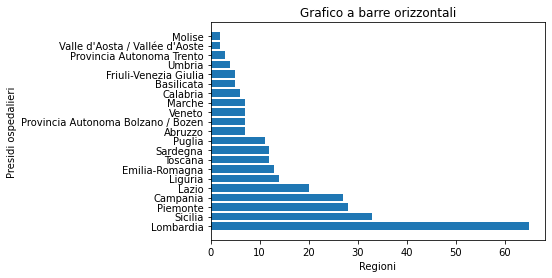

In [ ]:
fig = plt.figure()
ax = plt.axes()
ax.set_title('Grafico a barre orizzontali')
ax.set_xlabel('Regioni')
ax.set_ylabel('Presidi ospedalieri')
ax.barh(df1.index,df1['presidio_ospedaliero'])


6 Visualizzare il numero di province per ogni regione


In [ ]:
dfnum = df.groupby('nome_area')['provincia'].count()
dfnum

nome_area
Abruzzo                                7
Basilicata                             5
Calabria                               6
Campania                              27
Emilia-Romagna                        13
Friuli-Venezia Giulia                  5
Lazio                                 20
Liguria                               14
Lombardia                             65
Marche                                 7
Molise                                 2
Piemonte                              28
Provincia Autonoma Bolzano / Bozen     7
Provincia Autonoma Trento              3
Puglia                                11
Sardegna                              12
Sicilia                               33
Toscana                               12
Umbria                                 4
Valle d'Aosta / Vallée d'Aoste         2
Veneto                                 7
Name: provincia, dtype: int64

7 Visualizzare il grafico a torta dei dati dell’esercizio precedente. Inserire il titolo e la legenda


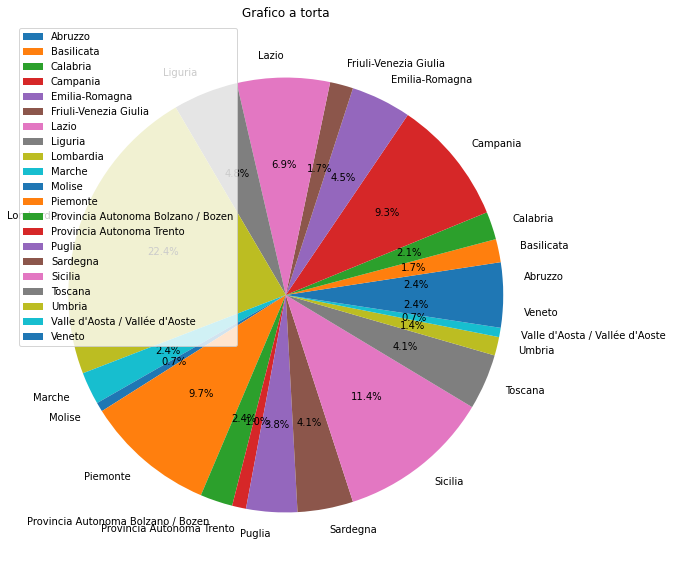

In [ ]:
fig = plt.figure(figsize=(10,10))
ax1 = plt.axes()
ax1.pie(dfnum.values,labels=dfnum.index,autopct= '%1.1f%%')
ax1.set_title('Grafico a torta')
ax1.legend()
plt.show()

8 Visualizzare un nuovo grafico con i grafici precedenti. Il nuovo grafico deve avere due righe e tre colonne e deve contenere nella prima riga tre volte il grafico a barre e nella seconda riga tre volte il grafico a torta


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: UserWarning: Tight layout not applied. tight_layout cannot make axes width small enough to accommodate all axes decorations
  # This is added back by InteractiveShellApp.init_path()


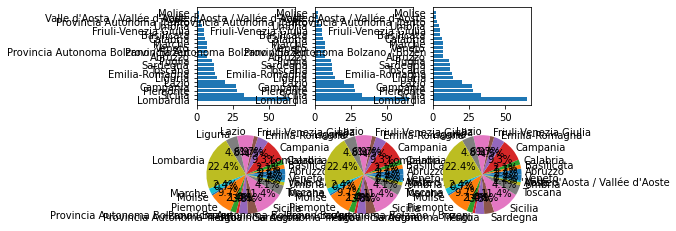

<Figure size 1440x720 with 0 Axes>

In [ ]:
fig, ax = plt.subplots(2,3) 
ax[0,0].barh(df1.index,df1['presidio_ospedaliero'])
ax[0,1].barh(df1.index,df1['presidio_ospedaliero'])
ax[0,2].barh(df1.index,df1['presidio_ospedaliero'])

ax[1,0].pie(dfnum.values,labels=dfnum.index,autopct= '%1.1f%%')
ax[1,1].pie(dfnum.values,labels=dfnum.index,autopct= '%1.1f%%')
ax[1,2].pie(dfnum.values,labels=dfnum.index,autopct= '%1.1f%%')

fig.tight_layout()

9 Salvare il grafico in un file .png


In [ ]:
fig.savefig('file.png')